In [25]:
import os
import glob
import re
import numpy as np
import scipy.sparse as sp
from libra_py import units, data_stat, influence_spectrum
import matplotlib.pyplot as plt
from liblibra_core import *
from libra_py.workflows.nbra import step3
import libra_py.packages.cp2k.methods as CP2K_methods

In [3]:
plt.rc('axes', titlesize=40)      # fontsize of the axes title
plt.rc('axes', labelsize=40)      # fontsize of the x and y labels
plt.rc('legend', fontsize=40)     # legend fontsize
plt.rc('xtick', labelsize=40)     # fontsize of the tick labels
plt.rc('ytick', labelsize=40)     # fontsize of the tick labels

#plt.rc('figure.subplot', left=0.2)
#plt.rc('figure.subplot', right=0.95)
#plt.rc('figure.subplot', bottom=0.2)
plt.rc('figure.subplot', top=0.88)


font = {'family': 'serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 36,
        }


(1199, 158)
(1199, 55)


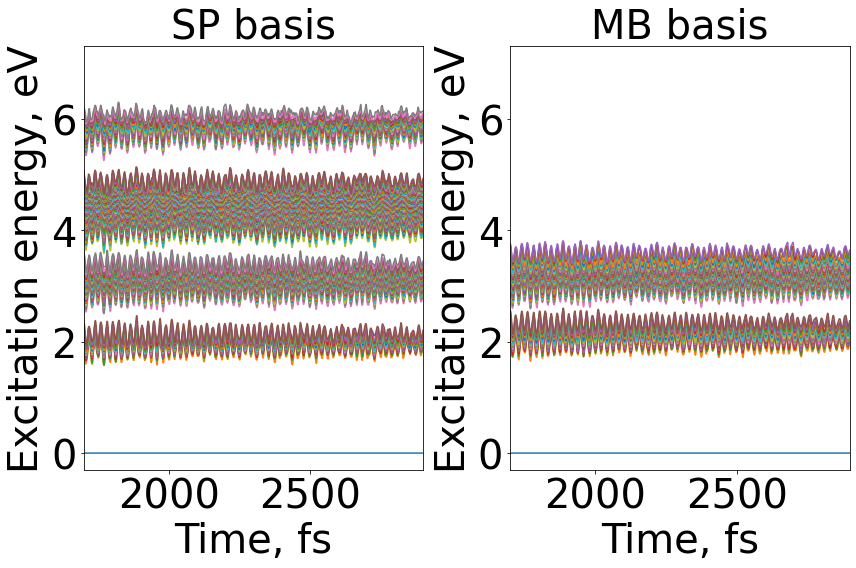

In [14]:
%matplotlib inline
params = {"path_to_energy_files": "res-mb-sd-DFT", "dt": 1.0, 
          "prefix": "Hvib_sd_", "suffix": "_re", "istep": 1800, "fstep": 2999}

titles = ['SP basis', 'MB basis']
fig, ax = plt.subplots(1,2, figsize=(12,8))
for c, basis in enumerate(['sd','ci']):
    #plt.subplot(1,2,c+1)
    params.update({"prefix": F"Hvib_{basis}_"})
    md_time, energies = CP2K_methods.extract_energies_sparse(params)
    energies = energies * units.au2ev
    print(energies.shape)
    for i in range(energies.shape[1]):
        #plt.plot(md_time, energies[:,i]-energies[:,0])
        ax[c].plot(md_time +1700, energies[:,i]-energies[:,0])

    ax[c].set_title(titles[c])
    ax[c].set_ylabel('Excitation energy, eV')
    ax[c].set_xlabel('Time, fs')
    ax[c].set_ylim(-0.3, 7.3)
        
    ax[c].margins(x=0)
plt.tight_layout()

(1199, 55)


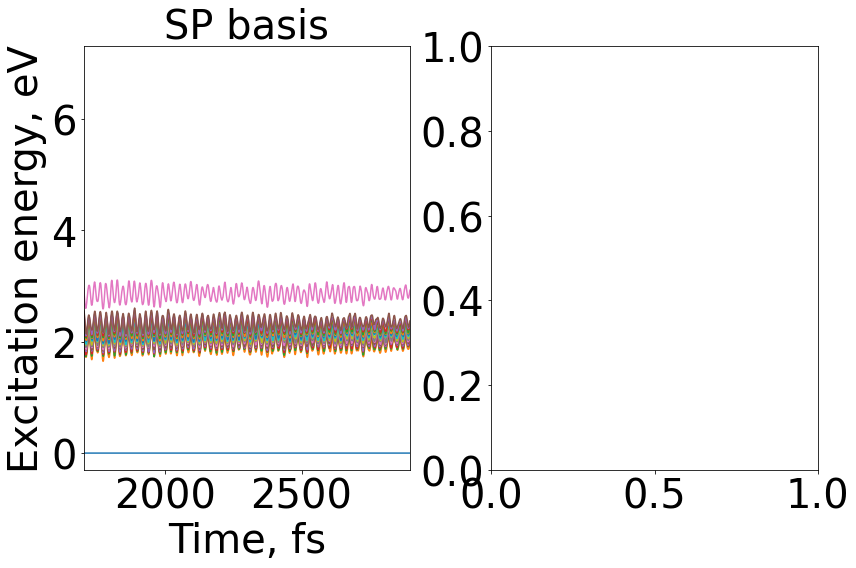

In [11]:
%matplotlib inline
params = {"path_to_energy_files": "res-mb-sd-DFT", "dt": 1.0, 
          "prefix": "Hvib_sd_", "suffix": "_re", "istep": 1800, "fstep": 2999}

titles = ['SP basis', 'MB basis']
fig, ax = plt.subplots(1,2, figsize=(12,8))
for c, basis in enumerate(['ci']):
    #plt.subplot(1,2,c+1)
    params.update({"prefix": F"Hvib_{basis}_"})
    md_time, energies = CP2K_methods.extract_energies_sparse(params)
    energies = energies * units.au2ev
    print(energies.shape)
    #for i in range(energies.shape[1]):
    for i in range(0, 17):    
        #plt.plot(md_time, energies[:,i]-energies[:,0])
        ax[c].plot(md_time +1700, energies[:,i]-energies[:,0])

    ax[c].set_title(titles[c])
    ax[c].set_ylabel('Excitation energy, eV')
    ax[c].set_xlabel('Time, fs')
    ax[c].set_ylim(-0.3, 7.3)
        
    ax[c].margins(x=0)
plt.tight_layout()

['C, s', 'C, p']


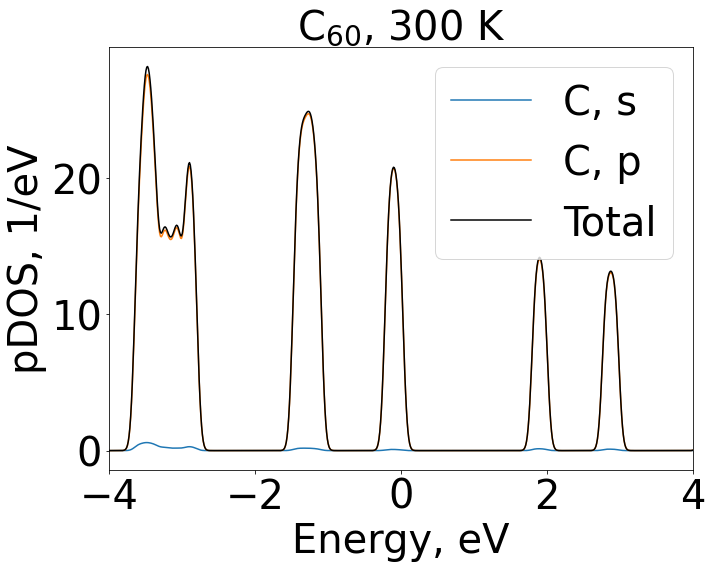

In [17]:
params = {"path_to_all_pdos": '../C60_step2/all_pdosfiles', "atoms": [[1] , ['C']],
          "orbitals_cols": [[3], range(4,7), range(7,12), range(12,19)], "orbitals":  ['s','p'],
          "npoints": 4000, "sigma": 0.05, "shift": 2.0}

fig, ax = plt.subplots(figsize=(10,8))

ave_energy_grid, homo_energy, ave_pdos_convolved, pdos_labels, ave_pdos_convolved_total = CP2K_methods.pdos(params)
print(pdos_labels)
for i in range(len(pdos_labels)):
    pdos_label = pdos_labels[i]
    ax.plot(ave_energy_grid-homo_energy, ave_pdos_convolved[i], label=pdos_label)
ax.plot(ave_energy_grid-homo_energy, ave_pdos_convolved_total, color='black', label='Total')
ax.legend()
ax.set_xlim(-4,4)
ax.set_ylabel('pDOS, 1/eV')
ax.set_xlabel('Energy, eV')
ax.set_title(r'C$_{60}$, 300 K')
plt.tight_layout()

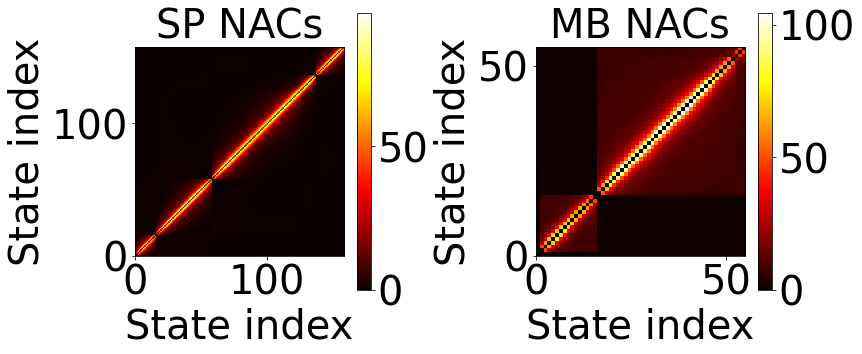

In [27]:
titles = ['SP','MB']
fig, ax = plt.subplots(1, 2, figsize=(12,8))
    
for c1, basis in enumerate(['sd', 'ci']):
    nac_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*im*')
    #print(nac_files)
    target_numbers = set(str(i) for i in range(1800, 2999))
    nac_files_sub = [file for file in nac_files if any(num in file for num in target_numbers)]
    #print(nac_files_sub)
    
    for c2, nac_file in enumerate(nac_files):
        nac_mat = sp.load_npz(nac_file).todense().real
        if c2==0:
            nac_ave = np.zeros(nac_mat.shape)
        nac_ave += np.abs(nac_mat)
    nac_ave *= 1000*units.au2ev/c2
    nstates = nac_ave.shape[0]
    
    ax[c1].imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates), vmin=0, vmax=20)
    ax[c1].set_xlabel('State index')
    ax[c1].set_ylabel('State index')
    
    #ax[c1].clim(vmin=0, vmax=20)    
    colorbar = fig.colorbar(ax[c1].imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates)), ax=ax[c1], shrink=0.5)
    #colorbar = ax[c1].colorbar(shrink=0.50)
    #colorbar.ax[c1].set_title('meV')

    ax[c1].set_title(F'{titles[c1]} NACs')
    plt.tight_layout()

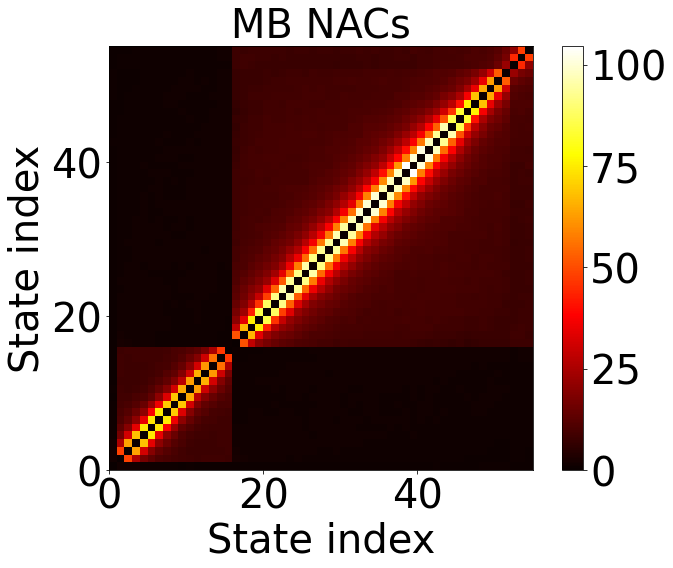

In [32]:
titles = ['MB']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
    
for c1, basis in enumerate(['ci']):
    nac_files = glob.glob(F'res-mb-sd-DFT/Hvib_{basis}*im*')
    #print(nac_files)
    target_numbers = set(str(i) for i in range(1800, 2999))
    nac_files_sub = [file for file in nac_files if any(num in file for num in target_numbers)]
    #print(nac_files_sub)
    
    for c2, nac_file in enumerate(nac_files):
        nac_mat = sp.load_npz(nac_file).todense().real
        if c2==0:
            nac_ave = np.zeros(nac_mat.shape)
        nac_ave += np.abs(nac_mat)
    nac_ave *= 1000*units.au2ev/c2
    nstates = nac_ave.shape[0]
    
    ax.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates), vmin=0, vmax=20)
    ax.set_xlabel('State index')
    ax.set_ylabel('State index')
    
    #ax[c1].clim(vmin=0, vmax=20)    
    colorbar = fig.colorbar(ax.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates)), ax=ax)#, shrink=0.5)
    #colorbar = ax[c1].colorbar(shrink=0.50)
    #colorbar.ax[c1].set_title('meV')

    ax.set_title(F'{titles[c1]} NACs')
    plt.tight_layout()

In [33]:
def read_Hvib(istep, fstep, path_to_save_Hvibs, params):
    ###########################################
    #istep = 0    # the first timestep to read
    #fstep = 5000 # the last timestep to read
    #itraj = 0
    #path_to_save_Hvibs = "res-mb-sd-DFT"
    ###########################################
    nsteps = fstep - istep
    NSTEPS = nsteps
    print(F"Number of steps = {nsteps}")

    NSTEPS = fstep - istep
    #================== Read energies =====================
    E = []
    for step in range(istep,fstep):
        energy_filename = F"{path_to_save_Hvibs}/Hvib_ci_{step}_re.npz"
        energy_mat = sp.load_npz(energy_filename)
        # For data conversion we need to turn np.ndarray to np.array so that
        # we can use data_conv.nparray2CMATRIX
        E.append( np.array( np.diag( energy_mat.todense() ) ) )
    params["E"] = np.array(E)

    NSTATES = E[0].shape[0]
    #================== Read time-overlap =====================
    St = []
    for step in range(istep,fstep):
        St_filename = F"{path_to_save_Hvibs}/St_ci_{step}_re.npz"
        St_mat = sp.load_npz(St_filename)
        St.append( np.array( St_mat.todense() ) )
    params["St"] = np.array(St)
    #================ Compute NACs and vibronic Hamiltonians along the trajectory ============
    NAC = []
    Hvib = []
    for c, step in enumerate(range(istep,fstep)):
        nac_filename = F"{path_to_save_Hvibs}/Hvib_ci_{step}_im.npz"
        nac_mat = sp.load_npz(nac_filename)
        NAC.append( np.array( nac_mat.todense() ) )
        Hvib.append( np.diag(params["E"][c, :])*(1.0+1j*0.0)  - (0.0+1j)*nac_mat[:, :] )

    params["NAC"] = np.array(NAC)
    params["Hvib"] = np.array(Hvib)

In [38]:
model_params_nbra = {}
path_to_save_Hvibs = F"/user/daehohan/vscr-alexeyak/daehohan/project_RPI_v5/C60_dyn/C60_step3/res-mb-sd-DFT"
read_Hvib(1800, 2999, path_to_save_Hvibs, model_params_nbra)

Number of steps = 1199


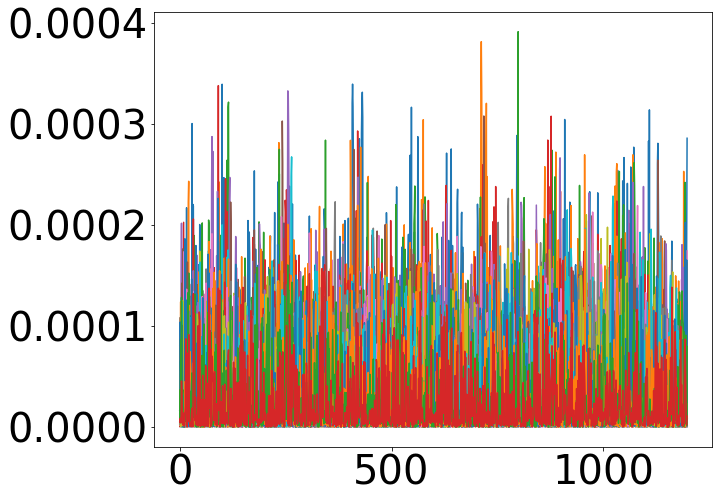

In [43]:
fig, ax = plt.subplots(figsize=(10,8))

for ist in range(1,55):
    ax.plot(np.abs(model_params_nbra["NAC"][:,0,ist]))